In [1]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib as mpl

In [2]:
print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Polars version: {pl.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Numpy version: 1.26.4
Pandas version: 2.3.3
Polars version: 1.36.1
Matplotlib version: 3.10.8


In [3]:
!ls ../data/middle_east

middle_east_events.csv


In [5]:
df = pd.read_csv('../data/middle_east/middle_east_events.csv')

df.head(3)

,WEEK,REGION,COUNTRY,ADMIN1,EVENT_TYPE,SUB_EVENT_TYPE,EVENTS,FATALITIES,POPULATION_EXPOSURE,DISORDER_TYPE,ID,CENTROID_LATITUDE,CENTROID_LONGITUDE
0,06-February-2016,Middle East,Bahrain,Capital,Battles,Armed clash,1,0,69821.0,Political violence,285.0,26.1927,50.5508
1,25-June-2016,Middle East,Bahrain,Capital,Explosions/Remote violence,Remote explosive/landmine/IED,1,1,5568.0,Political violence,285.0,26.1927,50.5508
2,11-February-2017,Middle East,Bahrain,Capital,Explosions/Remote violence,Remote explosive/landmine/IED,2,0,4084.0,Political violence,285.0,26.1927,50.5508


In [6]:
df.dtypes

WEEK                    object
REGION                  object
COUNTRY                 object
ADMIN1                  object
EVENT_TYPE              object
SUB_EVENT_TYPE          object
EVENTS                   int64
FATALITIES               int64
POPULATION_EXPOSURE    float64
DISORDER_TYPE           object
ID                     float64
CENTROID_LATITUDE      float64
CENTROID_LONGITUDE     float64
dtype: object

In [7]:
df.shape

(141487, 13)

In [8]:
df['WEEK'] = pd.to_datetime(df['WEEK'], format='%d-%B-%Y')

In [9]:
df.dtypes

WEEK                   datetime64[ns]
REGION                         object
COUNTRY                        object
ADMIN1                         object
EVENT_TYPE                     object
SUB_EVENT_TYPE                 object
EVENTS                          int64
FATALITIES                      int64
POPULATION_EXPOSURE           float64
DISORDER_TYPE                  object
ID                            float64
CENTROID_LATITUDE             float64
CENTROID_LONGITUDE            float64
dtype: object

In [10]:
df

,WEEK,REGION,COUNTRY,ADMIN1,EVENT_TYPE,SUB_EVENT_TYPE,EVENTS,FATALITIES,POPULATION_EXPOSURE,DISORDER_TYPE,ID,CENTROID_LATITUDE,CENTROID_LONGITUDE
0,2016-02-06,Middle East,Bahrain,Capital,Battles,Armed clash,1,0,69821.0,Political violence,285.0,26.1927,50.5508
1,2016-06-25,Middle East,Bahrain,Capital,Explosions/Remote violence,Remote explosive/landmine/IED,1,1,5568.0,Political violence,285.0,26.1927,50.5508
2,2017-02-11,Middle East,Bahrain,Capital,Explosions/Remote violence,Remote explosive/landmine/IED,2,0,4084.0,Political violence,285.0,26.1927,50.5508
3,2017-02-18,Middle East,Bahrain,Capital,Explosions/Remote violence,Remote explosive/landmine/IED,1,0,4084.0,Political violence,285.0,26.1927,50.5508
4,2017-08-12,Middle East,Bahrain,Capital,Explosions/Remote violence,Remote explosive/landmine/IED,1,0,4084.0,Political violence,285.0,26.1927,50.5508
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141482,2024-06-29,Middle East,Yemen,West Arabian Sea,Explosions/Remote violence,Shelling/artillery/missile attack,1,0,NaN,Political violence,4187.0,13.8711,57.1292
141483,2024-07-06,Middle East,Yemen,West Arabian Sea,Explosions/Remote violence,Shelling/artillery/missile attack,1,0,NaN,Political violence,4187.0,13.8711,57.1292
141484,2024-10-26,Middle East,Yemen,West Arabian Sea,Explosions/Remote violence,Shelling/artillery/missile attack,1,0,NaN,Political violence,4187.0,13.8711,57.1292
141485,2025-04-12,Middle East,Yemen,West Arabian Sea,Strategic developments,Change to group/activity,1,0,NaN,Strategic developments,4187.0,13.8711,57.1292


In [14]:
df.groupby("COUNTRY").agg({'FATALITIES': 'max'}).sort_values('FATALITIES')

,FATALITIES
COUNTRY,
Kuwait,1
United Arab Emirates,3
Bahrain,5
Oman,5
Qatar,6
Jordan,23
Turkey,113
Iran,176
Saudi Arabia,185


In [22]:
grouped_df = df.groupby("COUNTRY").agg({"FATALITIES": "sum"}).reset_index().sort_values(by='FATALITIES', ascending=False)

grouped_df

,COUNTRY,FATALITIES
14,Yemen,166606
11,Syria,142272
2,Iraq,107492
8,Palestine,71822
12,Turkey,9709
10,Saudi Arabia,6498
6,Lebanon,5591
1,Iran,3964
3,Israel,2027
4,Jordan,203


<Axes: xlabel='COUNTRY'>

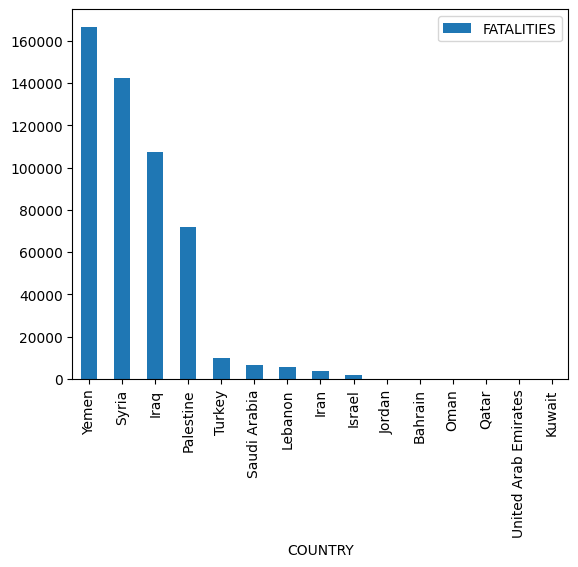

In [25]:
grouped_df.plot(kind='bar', x='COUNTRY')